In [1]:
import numpy  as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
digits.data[0]#1D data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.images[0]#2D data

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

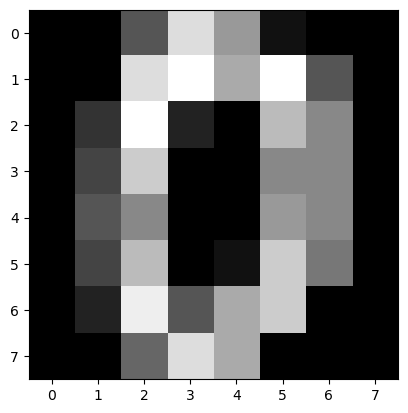

In [8]:
plt.imshow(digits.data[500].reshape(8,8),cmap=plt.cm.gray)#cmap-->color map
#imshow basically accepts input in form of 2D
plt.show()

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
data1=pd.DataFrame(digits.data,columns=digits.feature_names)
data1

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


**Data Standardization**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()
X_std=ss.fit_transform(data1)

In [13]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
X_std.shape

(1797, 64)

In [15]:
data2=pd.DataFrame(X_std,columns=data1.columns)
data2

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [16]:
cov_mat=np.cov(data2.T)#it is similar to A matrix of size 64*64

In [17]:
cov_mat#the values includes relationship variance among features
#explains how far each pixel_features varies

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [18]:
cov_mat.min()

-0.57051363323811

In [19]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [20]:
eig_vals#lambda values

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [21]:
eig_vecs[0]#lambda=7.3#PC1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [22]:
a=[]
for i in range(1,5):
    a.append(i**2)
a

[1, 4, 9, 16]

In [23]:
a=[i**2 for i in range(1,5)]
a

[1, 4, 9, 16]

In [24]:
a=[i**2 for i in range(1,5)]
a

[1, 4, 9, 16]

In [25]:
7/61

0.11475409836065574

In [26]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100  for i in eig_vals]  #indiviual explained variance
var_exp#returns the percentage of information captured by individual PC's

[12.033916097734895,
 9.561054403097852,
 8.444414892624577,
 6.49840790752417,
 4.8601548759664075,
 4.214119869271947,
 3.942082803567392,
 3.389380924638334,
 2.998221011625232,
 2.932002551252211,
 2.781805463550328,
 2.577055092581994,
 2.2753033157642486,
 2.227179739514349,
 2.1652294318492467,
 1.9141666064421248,
 1.7755470851681954,
 1.6380692742844216,
 1.5964601688623403,
 1.4891911870878174,
 1.3479695658179398,
 1.2719313702347568,
 1.1658373505919504,
 1.057646598536322,
 0.9753159471981102,
 0.944558989731997,
 0.8630138269707238,
 0.8366428536685129,
 0.7976932484112439,
 0.7464713709260609,
 0.7255821513702744,
 0.6919112454811818,
 0.6539085355726157,
 0.6407925738459852,
 0.5913841117223431,
 0.5711624052235227,
 0.5236368034166362,
 0.48180758644514166,
 0.08253509448180288,
 0.45371925985844846,
 0.1036957301557182,
 0.4231627532327792,
 0.4060530699790376,
 0.3970848082758281,
 0.1251007424973019,
 0.13511841133708577,
 0.14776269410608814,
 0.16123606225672693,


In [27]:
cum_var_exp=np.cumsum(var_exp)
cum_var_exp    #how much your data varies

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

In [28]:
cum_var_exp[cum_var_exp<95].shape

(41,)

In [29]:
list(range(len(cum_var_exp)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63]

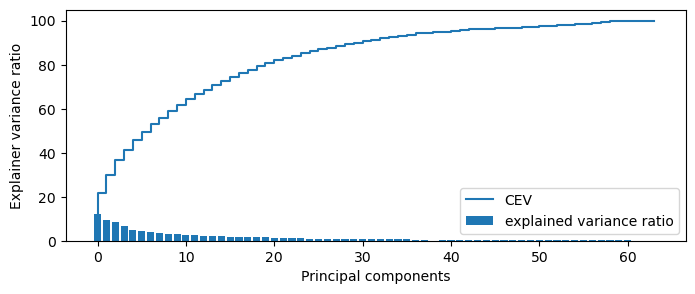

In [30]:
plt.figure(figsize=(8,3))
plt.bar(range(len(cum_var_exp)),var_exp,label='explained variance ratio')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='CEV')
plt.ylabel('Explainer variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
#PCA
from sklearn.decomposition import PCA

p = PCA(n_components=0.80)
pca_data = p.fit_transform(X)

In [31]:
pca=PCA(n_components=41)
res=pca.fit_transform(data2)
res.shape

(1797, 41)

In [32]:
res

array([[-1.91421366e+00, -9.54501571e-01, -3.94603482e+00, ...,
         2.49306000e-02, -3.21931463e-01,  1.38675325e-02],
       [-5.88980330e-01,  9.24635800e-01,  3.92475494e+00, ...,
         8.71084347e-02,  4.89142988e-01, -1.02635106e-03],
       [-1.30203906e+00, -3.17188827e-01,  3.02333293e+00, ...,
        -1.27887450e+00, -5.45833870e-01, -3.44005211e-01],
       ...,
       [-1.02259599e+00, -1.47910870e-01,  2.46997365e+00, ...,
         4.12387985e-01, -1.20886377e+00, -5.30790689e-01],
       [-1.07605522e+00, -3.80906254e-01, -2.45548693e+00, ...,
        -6.98634834e-01,  4.43399629e-01,  1.73600234e-01],
       [ 1.25770233e+00, -2.22759088e+00,  2.83627891e-01, ...,
         1.28551036e-01, -1.32137195e+00,  1.60506364e-01]])

In [33]:
# pca_x_train=pca.fit_transform(x_train)
# pca_x_test=pca.transform(x_test)

In [34]:
# pca_x_train.shape

In [35]:
print(pca.n_components)
print(pca.explained_variance_ratio_)

41
[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163 0.00406053]


In [36]:
pcs_df =pd.DataFrame(pca.components_, columns=data2.columns)
pcs_df #components_ -->returns loading values-->feature importance/contributions
#on each and every PC's

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,-0.0,0.182234,0.285868,0.220370,-0.025170,-0.009497,-0.052476,-0.062695,0.034707,0.245534,...,0.121247,0.048771,-0.001836,0.160396,0.279853,0.194449,0.017774,0.103198,0.119811,0.071494
1,0.0,0.047027,0.059565,-0.020804,0.155903,0.274133,0.249733,0.145832,-0.001027,0.027619,...,-0.257752,-0.115002,0.004883,0.044498,0.081400,-0.009905,-0.251934,-0.242618,-0.165089,-0.071329
2,-0.0,0.023588,-0.056799,-0.040464,-0.067065,-0.091090,-0.037578,-0.022546,0.002813,-0.050642,...,-0.023179,0.102993,0.011547,0.033895,-0.051273,-0.083464,-0.062455,-0.022280,0.100366,0.092446
3,-0.0,-0.178153,-0.156129,-0.167800,0.000009,0.000519,-0.043699,-0.008749,-0.014401,-0.124042,...,0.157440,0.130346,-0.007788,-0.186418,-0.165488,-0.171490,0.154438,0.252432,0.160720,0.118180
4,-0.0,-0.029978,-0.014666,0.043716,-0.139993,0.007988,0.211222,0.281818,-0.000631,0.006788,...,0.192448,0.248962,-0.051238,-0.039182,-0.033454,0.100375,-0.003774,0.094738,0.244026,0.231705
5,-0.0,0.231723,0.119875,-0.100392,-0.093471,-0.082205,0.030190,0.157874,-0.023338,0.065014,...,-0.000411,0.004010,0.126622,0.260497,0.109752,-0.086503,0.111832,0.057756,0.028957,0.016318
6,0.0,0.108310,0.004755,-0.233717,0.039540,0.145979,0.036356,-0.098105,0.078248,0.124266,...,-0.081063,-0.083120,-0.016197,0.091563,-0.014837,-0.135319,0.172848,0.032155,-0.077612,-0.026422
7,0.0,-0.125524,-0.006178,0.033408,-0.046161,-0.080329,-0.106751,-0.080032,0.021872,-0.024172,...,-0.130898,0.178454,0.057208,-0.110133,-0.040827,0.098852,0.055067,-0.034265,0.164484,0.350964
8,-0.0,-0.213820,-0.120140,0.101895,0.093102,-0.063987,-0.038021,0.158186,0.150700,-0.017302,...,-0.026580,-0.188184,0.034097,-0.214551,-0.115364,0.115978,0.154210,0.027141,-0.144245,-0.219669
9,-0.0,0.059834,0.007681,-0.021639,0.005066,-0.164122,-0.187892,-0.065340,0.204883,0.208722,...,0.039391,0.026793,-0.023696,0.009630,0.013371,-0.105825,-0.100353,-0.036675,0.057176,0.029197


In [51]:


# Display the components with feature contributions for each PC
print("Feature contributions in each Principal Component:")
for i, pc in pcs_df.iterrows():
    print(f"\nPrincipal Component {i + 1}:")
    # Sort features by absolute value of their contribution to each PC
    sorted_pc = pc.abs().sort_values(ascending=False)
    print(sorted_pc)

Feature contributions in each Principal Component:

Principal Component 1:
pixel_0_2    0.285868
pixel_7_2    0.279853
pixel_1_1    0.245534
pixel_4_1    0.238903
pixel_4_2    0.235006
               ...   
pixel_5_7    0.002273
pixel_7_0    0.001836
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Name: 0, Length: 64, dtype: float64

Principal Component 2:
pixel_0_5    0.274133
pixel_1_6    0.266536
pixel_6_6    0.257752
pixel_7_4    0.251934
pixel_0_6    0.249733
               ...   
pixel_3_0    0.003884
pixel_1_0    0.001027
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Name: 1, Length: 64, dtype: float64

Principal Component 3:
pixel_5_3    0.323146
pixel_4_3    0.277481
pixel_5_4    0.269044
pixel_4_4    0.247728
pixel_4_6    0.220646
               ...   
pixel_6_0    0.004022
pixel_1_0    0.002813
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Name: 2, Length: 64, dtype: float64

Principal Component 4:
pixel_7_5    0.2524

In [52]:
#model building
data2=pd.DataFrame(X_std,columns=data1.columns)
data2

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [53]:
y=digits.target
y.shape

(1797,)

In [54]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(data2,y,train_size=0.75,
                                               random_state=42)

In [57]:
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)
print(pca_x_train.shape)

(1347, 41)


In [58]:
print(pca_x_test.shape)

(450, 41)


In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(pca_x_train,y_train)
y_pred=lr.predict(pca_x_test)

In [61]:
from sklearn.metrics import *

In [62]:
accuracy_score(y_test,y_pred)

0.9666666666666667

<Axes: >

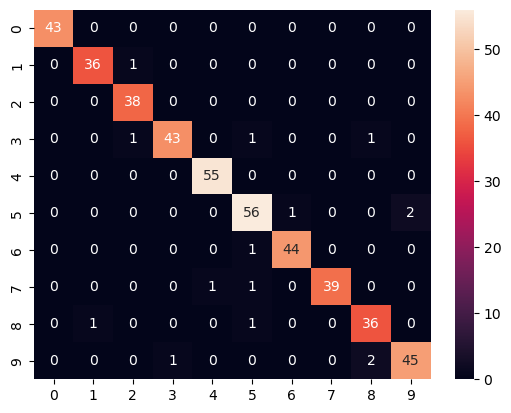

In [63]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier()
dt.fit(pca_x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred=dt.predict(pca_x_test)

In [48]:
accuracy_score(y_pred,y_test)

0.84

In [49]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

<Axes: >

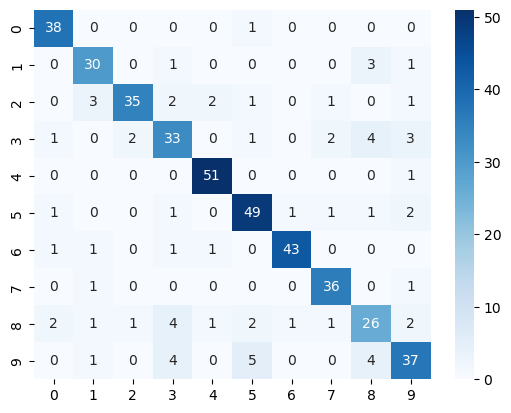

In [50]:
from sklearn.metrics import *
sns.heatmap(confusion_matrix(y_pred,y_test),cmap='Blues',annot=True)